In [2]:
import pandas as pd
df=pd.read_csv('c:/data/iris/iris2.csv')
df.columns

Index(['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth', 'Name',
       'Species'],
      dtype='object')

In [4]:
cols=['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth']
X=df[cols]
y=df["Species"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_score=model.decision_function(X)
y_score

array([[  6.69170682,   2.87294711,  -9.56465393],
       [  6.33123978,   2.96080417,  -9.29204395],
       [  6.81986694,   2.82463778,  -9.64450472],
       [  6.30399572,   2.80410852,  -9.10810424],
       [  6.81914604,   2.80114878,  -9.62029481],
       [  6.021047  ,   2.66213383,  -8.68318083],
       [  6.70024319,   2.6261125 ,  -9.32635569],
       [  6.40958432,   2.85984813,  -9.26943245],
       [  6.44099689,   2.80020141,  -9.2411983 ],
       [  6.2866183 ,   3.00654092,  -9.29315921],
       [  6.51517293,   2.91558774,  -9.43076067],
       [  6.25490105,   2.77495081,  -9.02985186],
       [  6.47199324,   3.0083025 ,  -9.48029574],
       [  7.37090301,   2.83692577, -10.20782878],
       [  7.32200769,   2.9936182 , -10.31562589],
       [  6.80947876,   2.62787086,  -9.43734962],
       [  6.95604188,   2.69185497,  -9.64789685],
       [  6.59048608,   2.78671526,  -9.37720134],
       [  5.91576308,   2.89763105,  -8.81339413],
       [  6.62045685,   2.68009

In [7]:
from sklearn.metrics import confusion_matrix
y_hat=model.predict(X_test)
confusion_matrix(y_test, y_hat, labels=[0,1,2])

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
from sklearn.metrics import roc_curve

In [10]:
from sklearn.preprocessing import label_binarize
y=label_binarize(y, classes=[0,1,2])

{0: 1.0, 1: 0.46040000000000003, 2: 0.9967999999999999}


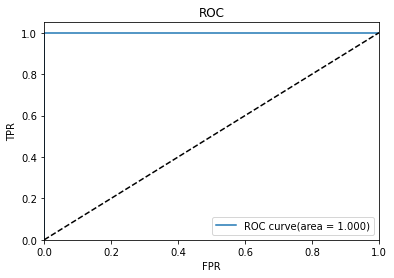

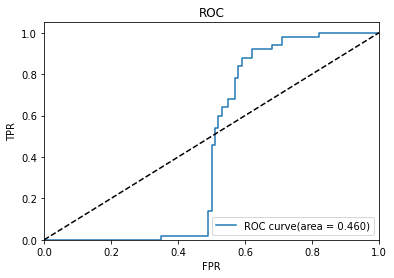

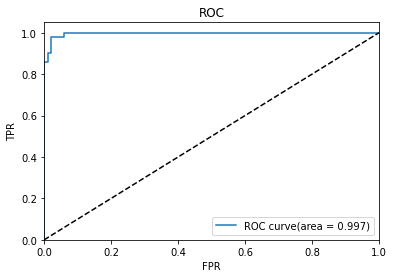

In [11]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

n_classes=3

fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i], tpr[i],_=roc_curve(y[:,i], y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

print(roc_auc)
y_score = model.decision_function(X)
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i],tpr[i], label='ROC curve(area = %.3f)'%roc_auc[i])
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()